# Gaussian Classifier

In [ ]:
# Mount Google drive and cd to working folder
%cd /content/drive/My Drive/Learning/EIE4105/lab1/python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Learning/EIE4105/lab1/python


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

In [ ]:
class Gauss_class_diag():
    """
    This class implements a Gaussian classifier with diagonal covariance matrices 
    """
    def fit(self, X, y, epsilon = 0.5e-1): 
        self.stats = dict()
        self.priors = dict()
        self.labels = set(y.astype(int))    # Unique class labels: 0,1,2,...,K-1
        for k in self.labels:    
            X_k = X[y==k,:]     # Select data from the k-th class
            self.stats[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon }
            self.priors[k]=len(X_k)/len(X)
    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N,len(self.labels)))
        for k, s in self.stats.items():
            P_hat[:,k] = mvn.logpdf(X, s["mean"], s["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [ ]:
class Gauss_class_full():
    """
    This class implements a Gaussian classifier with full covariance matrices
    """
    def fit(self, X,y, epsilon=0.5e-1):
        self.stats = dict()
        self.priors = dict()
        self.labels = set(y.astype(int))
        for k in self.labels:
            X_k = X[y==k,:]
            N_k,D = X_k.shape   # N_k=total number of observations of that class
            mu_k = X_k.mean(axis=0)
            self.stats[k] = {"mean":X_k.mean(axis=0), 
                              "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k) + 
                             epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
    def predict(self, X):
        N,D = X.shape
        P_hat = np.zeros((N,len(self.labels)))
        for k,s in self.stats.items():
            P_hat[:,k] = mvn.logpdf(X, s["mean"], s["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [ ]:
# Loading the data
from mnist import load_mnist

trainpath = '../data/noisy_train_digits.mat'
testpath = '../data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels= load_mnist(trainpath, testpath)

In [ ]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [ ]:
# Create a Gaussian classifier with diagonal covariance matrices
gcd = Gauss_class_diag()

In [ ]:
# Load 100 training samples
from mnist import load_SampleMnist

nSamples = 100
train_data, train_labels, test_data, test_labels = load_SampleMnist(trainpath,testpath,nSamples)

In [ ]:
# Train the Gaussian classifier
gcd.fit(train_data,train_labels)

In [ ]:
# Predict the class labels of training samples
y_train_gcd = gcd.predict(train_data)

In [ ]:
# Predict the class labels of test samples
y_test_gcd = gcd.predict(test_data)

In [ ]:
# Training accuracy
accuracy(train_labels, y_train_gcd)

0.891

In [ ]:
# Test accuracy
accuracy(test_labels, y_test_gcd)

0.8146

Text(0.5, 42.0, 'Predicted label')

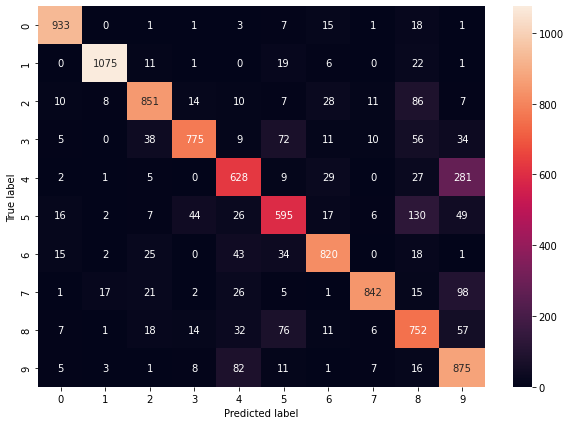

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(y_test_gcd, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Create a Gaussian classifier with full convariance matrices
gcf = Gauss_class_full()

In [ ]:
# Train the classifier
gcf.fit(train_data, train_labels, epsilon=0)

In [ ]:
# Predict the class labels of training data
y_train_gcf = gcf.predict(train_data)

LinAlgError: ignored

In [ ]:
# Predict the class labels of test data
y_test_gcf = gcf.predict(test_data)

In [ ]:
# Training accuracy
accuracy(train_labels, y_train_gcf)

1.0

In [ ]:
# Test accuracy
accuracy(test_labels, y_test_gcf)

0.9309

Text(0.5, 42.0, 'Predicted label')

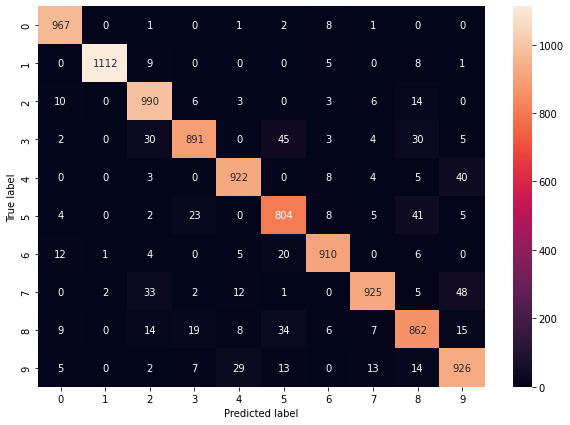

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(y_test_gcf, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')